# Data formatting for bounding box labels
We consider the data exported from PlainSight in COCO format, reformat this into YOLOv5 format and plot the resulting bounding boxes as a sanity check. We also combine the seperate exports from Pete and Thomas.

In [1]:
import os
import sys

# Root directory
root_dir = '/Users/Holmes/Research/Projects/vespalert'
os.chdir(root_dir)  # Move to root_dir
sys.path.insert(0, root_dir)

# Data directory
box_expansion_factor = 0.0
data_dir = os.path.join(root_dir, 'datasets/boxes-21')
os.listdir(data_dir)

# Automatically reload imported programmes
%load_ext autoreload
%autoreload 2

## Create YOLOv5 annotation files from JSON files

This first function reads the json_file in the list and extracts the annotations attached to each image file. The output is a list of dictionaries, one for each image.

Next it creates a temporary directory ann in which to store the YOLOv5 formatted annotations. We optionally expand the box sides by a proportion of the tight-fitting length; this helps include the legs.

In [2]:
from formatting.boxes import yolov5_boxes_from_json
json_files = [
    'train-kitchen-a.json',
    'train-pete-a.json',
    'train-thomas-a.json',
    'train-thomas-b.json',
    'test-kitchen-a.json',
    'test-pete-a.json',
    'test-thomas-a.json',
    'test-thomas-b.json',
    'validation-kitchen-a.json',
    'validation-pete-a.json',
    'validation-thomas-a.json',
    'validation-thomas-b.json',
]
dict_list = yolov5_boxes_from_json(data_dir, json_files)

['train-kitchen-a.json', 'train-pete-a.json', 'train-thomas-a.json', 'train-thomas-b.json', 'test-kitchen-a.json', 'test-pete-a.json', 'test-thomas-a.json', 'test-thomas-b.json', 'validation-kitchen-a.json', 'validation-pete-a.json', 'validation-thomas-a.json', 'validation-thomas-b.json']
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/train-kitchen-a.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/train-pete-a.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/train-thomas-a.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/train-thomas-b.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/test-kitchen-a.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/test-pete-a.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/test-thomas-a.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/test-thomas-b.json
/Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/validation-kitch

In [3]:
dict_list[0]

{'bboxes': [{'class': 0,
   'ymin': 568.970253610111,
   'ymax': 748.9416944451805,
   'xmin': 875.838598761414,
   'xmax': 1070.5572016666804}],
 'filename': 'img/01G2Z290M3EMGT80W6252PB383.jpeg',
 'image_id': 'train-kitchen-a-01G2Z290M3EMGT80W6252PB383.jpeg',
 'image_size': (1080, 1920)}

## Split into data subsets
Next we split the image and annotation files into an 80:10:10 split: `train`, `val` and `test` as subdirectories of the new folders `images` and `labels`.

In [4]:
from formatting.boxes import split_train_val_test

split_train_val_test(data_dir)

Optionally, store locations of the `train`, `val` and `test` files in a locally pointing YAML for the model to read. 

In [5]:
from formatting.boxes import write_yaml

yaml_name = 'config-local.yaml'
write_yaml(data_dir, yaml_name)

## Plot example annotated images
Vespa crabro is boxed in *yellow*;
Vespa velutina in *red*.

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01G2Z28XDTDFVPYDVSPD2SG142.txt
Annotations:
['0', '0.511', '0.607', '0.106', '0.179']
Vespa crabro (yellow) count:  1
Vespa velutina (red) count:  0


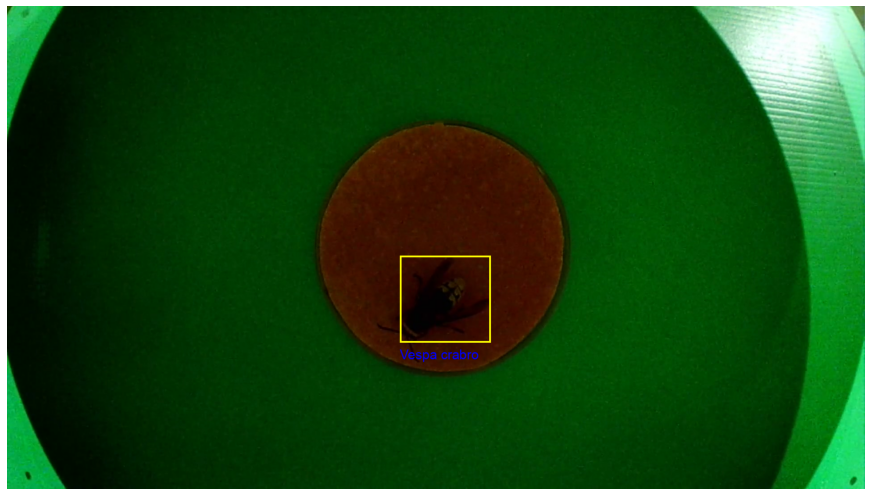

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FVD4CJGHF5M3QS4K09ZC65K2.txt
Annotations:
['0', '0.474', '0.662', '0.080', '0.072']
Vespa crabro (yellow) count:  1
Vespa velutina (red) count:  0


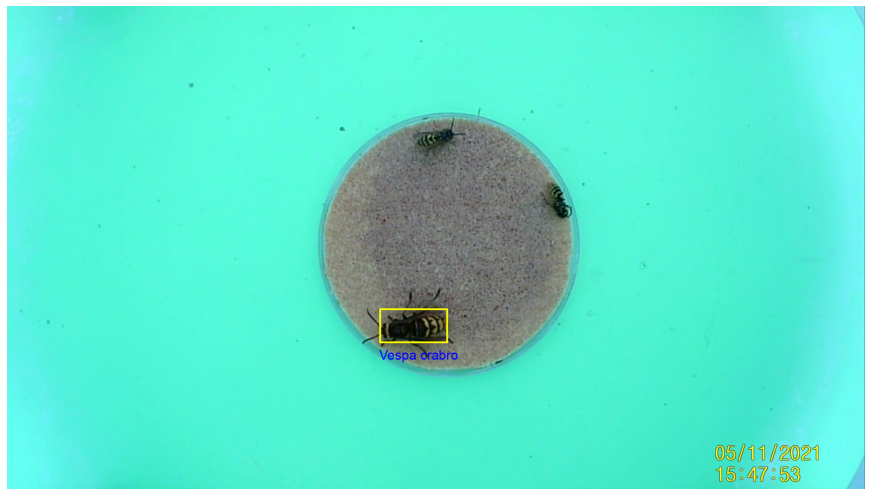

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01G3ECW5HS0H4R29YKSH4W00M1.txt
Annotations:
['1', '0.568', '0.442', '0.083', '0.146']
['1', '0.680', '0.389', '0.052', '0.166']
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  2


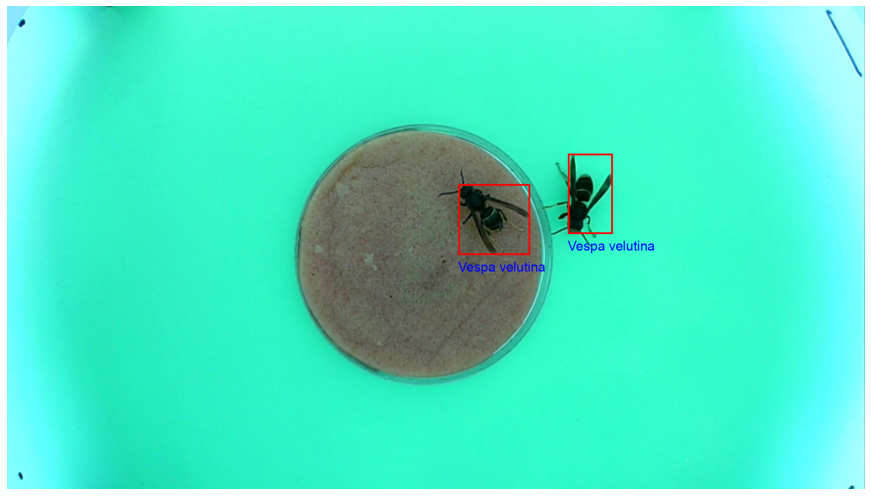

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FWE0VXYQDDTGC5Q7DE81EJG6.txt
Annotations:
['1', '0.409', '0.344', '0.062', '0.148']
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


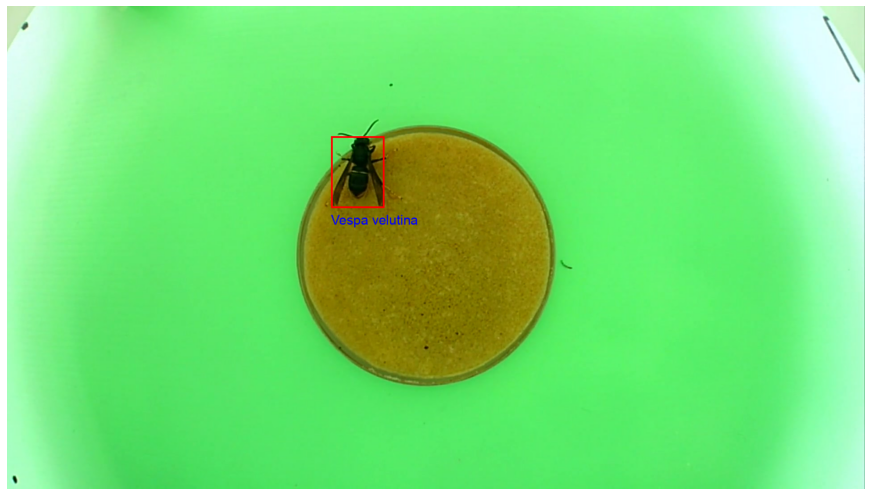

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FVFE2QBE5PKE7FAY99WN1AVR.txt
Annotations:
['1', '0.172', '0.297', '0.037', '0.123']
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


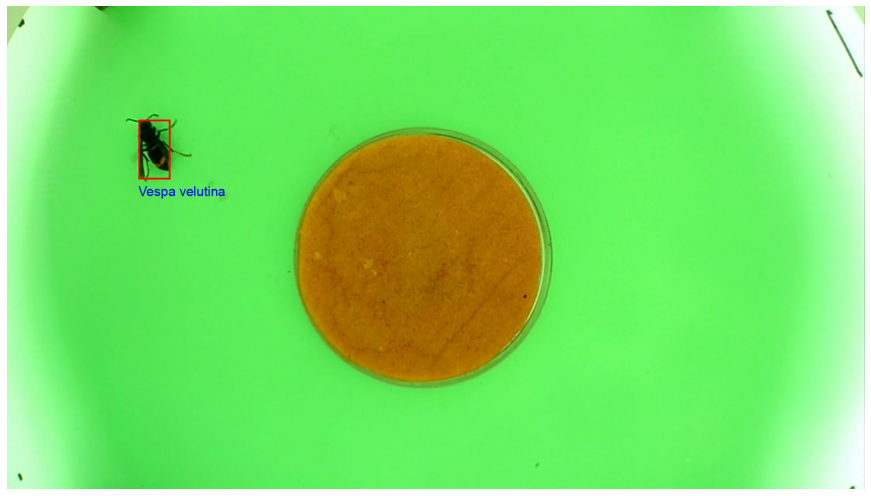

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FVFE2AMY2JF8GNCZA95HQY1X.txt
Annotations:
['1', '0.584', '0.508', '0.078', '0.127']
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


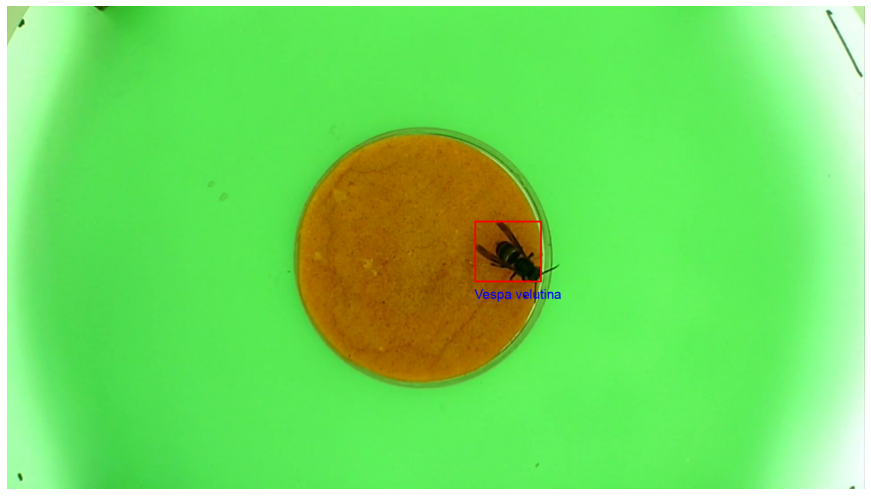

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FVMMHFDAP44WW199JP8A4XT0.txt
Annotations:
['0', '0.610', '0.581', '0.044', '0.145']
Vespa crabro (yellow) count:  1
Vespa velutina (red) count:  0


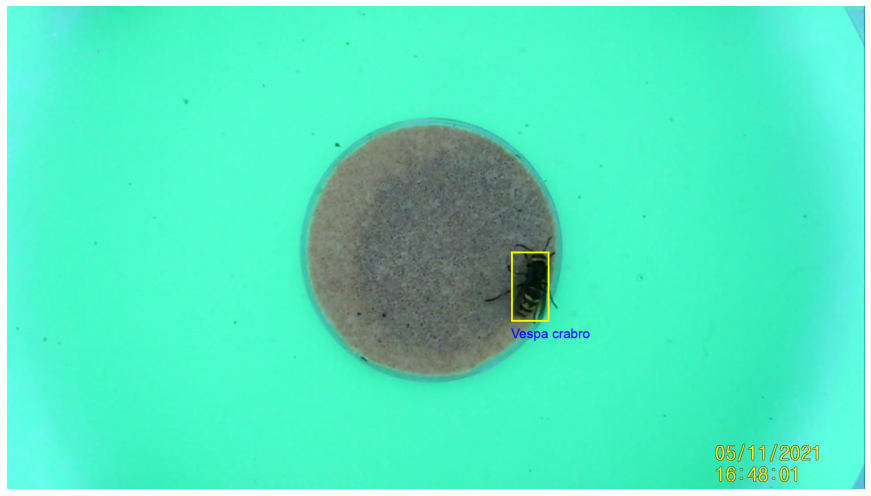

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FW693CMNWR8JDQ6Q25219D3G.txt
Annotations:
['0', '0.575', '0.657', '0.068', '0.154']
['0', '0.374', '0.568', '0.059', '0.133']
['0', '0.384', '0.471', '0.063', '0.139']
Vespa crabro (yellow) count:  3
Vespa velutina (red) count:  0


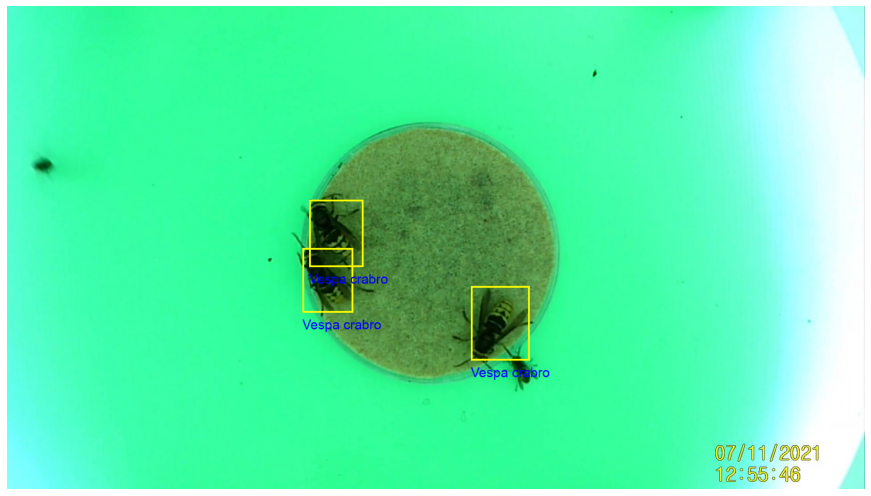

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FWEFMFP3YE4W0SY7PS1GAF8B.txt
Annotations:
['1', '0.513', '0.743', '0.064', '0.143']
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


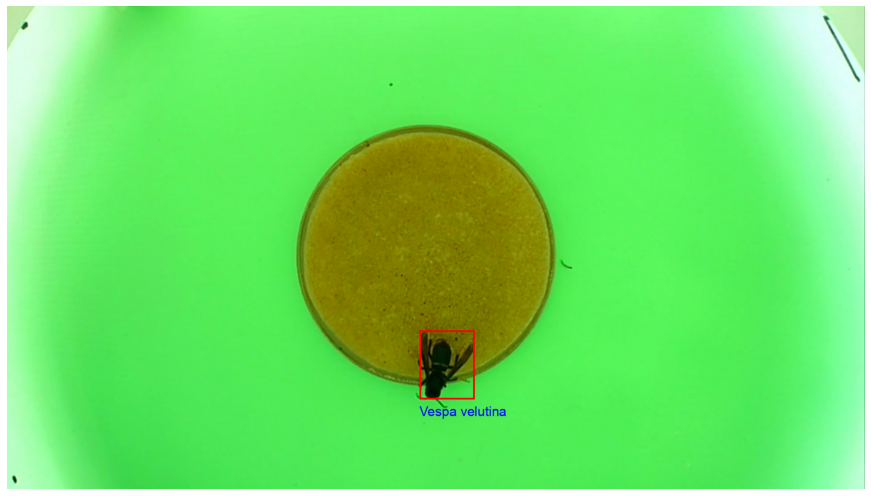

File name: /Users/Holmes/Research/Projects/vespalert/datasets/boxes-21/labels/train/01FW694FQHPGM6V5RW348DAKD4.txt
Annotations:
['0', '0.385', '0.543', '0.050', '0.155']
['0', '0.605', '0.429', '0.074', '0.108']
Vespa crabro (yellow) count:  2
Vespa velutina (red) count:  0


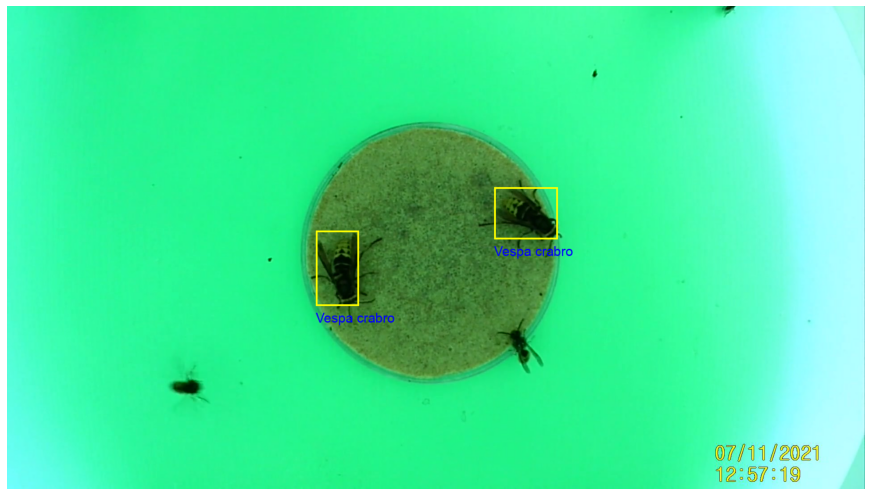

In [6]:
import glob
import random
from formatting.boxes import check_bboxes
%matplotlib inline

annotation_files = glob.glob(os.path.join(data_dir, 'labels/train/*.txt'))

# Randomly choose annotation files to overlay onto images
random.seed(0)
selection = random.choices(annotation_files, k=10)


# `plot_bounding_boxes` uses PIL.ImageDraw: if problem, set `print_labels=False`.
os.makedirs(os.path.join(data_dir, 'examples'), exist_ok=True)
for file in selection:
    print('File name:', file)
    fig, file_name = check_bboxes(file, print_labels=True)
    fig.savefig(os.path.join(
            data_dir, 'examples', 'labelled-' + os.path.basename(file_name)
        ))
